In [83]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

# URL del archivo de datos de COVID-19
url1 = "https://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip"
url2 = "https://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/diccionario_datos_covid19.zip"

# Descargar el archivo y guardar su contenido en un archivo local
def descargar_archivo(url, ruta_guardado):
    # Verificar si el archivo ya existe
    if os.path.exists(ruta_guardado):
        print(f"El archivo {ruta_guardado} ya existe.")
    else:
        # Descargar el archivo desde la URL
        print(f"Descargando {url}...")
        response = requests.get(url)
        # Guardar el archivo descargado en la ruta especificada
        with open(ruta_guardado, "wb") as f:
            f.write(response.content)
        print(f"Archivo guardado en {ruta_guardado}.")

descargar_archivo(url1, "./datos_abiertos_covid19.zip")
descargar_archivo(url2, "./diccionario_datos_covid19.zip")
   
    

El archivo ./datos_abiertos_covid19.zip ya existe.
El archivo ./diccionario_datos_covid19.zip ya existe.


C:\Users\Alexander\AppData\Local\Temp\ipykernel_728\3967335740.py:5: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datos_abiertos_covid19.zip', nrows=2000000, compression='zip', header=0, sep=',', quotechar='"')


2022-01-02       0.101794
2022-01-09       0.130685
2022-01-16       0.258407
2022-01-23       0.635742
2022-01-30       1.330623
2022-02-06       2.301908
2022-02-13       4.251370
2022-02-20    1280.341880
2022-02-27    1347.727273
2022-03-06     688.235294
2022-03-13     195.833333
2022-03-20      73.809524
2022-03-27      57.500000
2022-04-03      31.250000
2022-04-10      15.555556
2022-04-17      12.121212
2022-04-24      66.666667
2022-05-01     100.000000
2022-05-08      83.333333
2022-05-15       0.000000
2022-05-22      37.500000
2022-05-29       0.000000
2022-06-05       0.000000
2022-06-12       7.142857
2022-06-19       0.000000
2022-06-26       0.000000
2022-07-03       0.000000
2022-07-10       4.545455
2022-07-17       0.000000
2022-07-24       0.000000
2022-07-31       0.000000
2022-08-07       6.666667
2022-08-14       0.000000
2022-08-21       0.000000
2022-08-28       0.000000
2022-09-04     100.000000
2022-09-11      11.111111
2022-09-18       0.000000
2022-09-25  

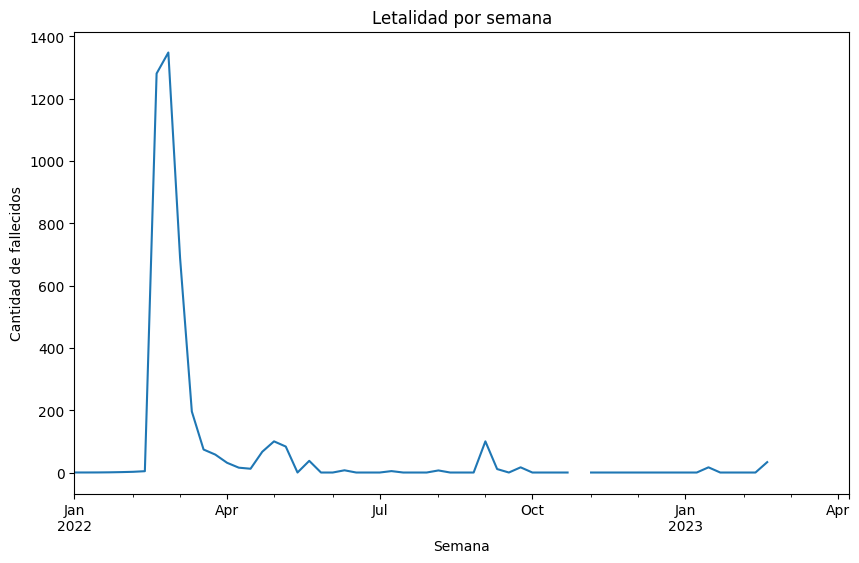

In [84]:

pd.set_option('display.max_columns', None)  # muestra todas las columnas
pd.set_option('display.max_rows', None)  # muestra todas las filas

# Carga de datos
df = pd.read_csv('datos_abiertos_covid19.zip', nrows=2000000, compression='zip', header=0, sep=',', quotechar='"')

# Convertir las fechas a formato datetime
mask = df['PAIS_NACIONALIDAD'] == 'México'

df['FECHA_INGRESO'] = pd.to_datetime(df.loc[mask, 'FECHA_INGRESO'], format='%Y-%m-%d')

# Agrupar los datos por semana y contar la cantidad de ingresos en cada semana
ingresos_por_semana = df.resample('W', on='FECHA_INGRESO')['FECHA_INGRESO'].count()

# Convertir las fechas de defunción a formato datetime
df['FECHA_DEF'] = pd.to_datetime(df.loc[mask,'FECHA_DEF'], format='%Y-%m-%d', errors='coerce')

# Eliminar las filas donde FECHA_DEF es nulo
df.dropna(subset=['FECHA_DEF'], inplace=True)

# Agrupar los datos por semana y contar la cantidad de fallecidos en cada semana
fallecidos_por_semana = df.resample('W', on='FECHA_DEF')['FECHA_DEF'].count()

# Calcular la letalidad por semana
letalidad_por_semana = (fallecidos_por_semana / ingresos_por_semana) * 100

# Mostrar el resultado
print(letalidad_por_semana)

# Graficamos los datos
letalidad_por_semana.plot(figsize=(10, 6))
plt.title('Letalidad por semana')
plt.xlabel('Semana')
plt.ylabel('Cantidad de fallecidos')
plt.show()



2022-01-02           NaN
2022-01-09     30.434783
2022-01-16     45.522388
2022-01-23     77.852349
2022-01-30     87.292818
2022-02-06    112.666667
2022-02-13    196.666667
2022-02-20           NaN
2022-02-27           NaN
2022-03-06           NaN
2022-03-13           NaN
2022-03-20           NaN
2022-03-27           NaN
2022-04-03           NaN
2022-04-10           NaN
dtype: float64


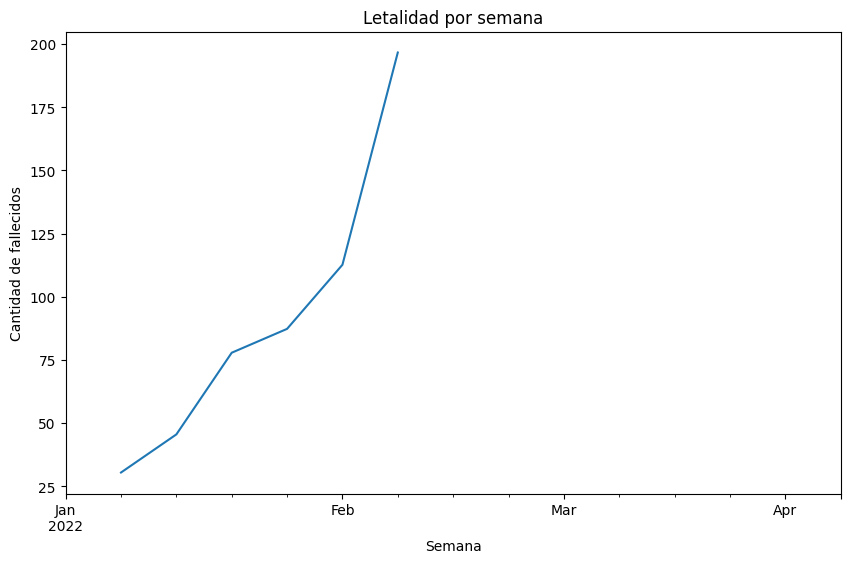

In [85]:
mask_sonora = (df['ENTIDAD_RES'] == 26)

df['FECHA_INGRESO_HERMOSILLO'] = pd.to_datetime(df.loc[mask_sonora, 'FECHA_INGRESO'], format='%Y-%m-%d')

ingresos_por_semana_sonora = df.resample('W', on='FECHA_INGRESO_HERMOSILLO')['FECHA_INGRESO_HERMOSILLO'].count()

df['FECHA_DEF_HERMOSILLO'] = pd.to_datetime(df.loc[mask_sonora,'FECHA_DEF'], format='%Y-%m-%d', errors='coerce')

df.dropna(subset=['FECHA_DEF_HERMOSILLO'], inplace=True)

fallecidos_por_semana_sonora = df.resample('W', on='FECHA_DEF_HERMOSILLO')['FECHA_DEF_HERMOSILLO'].count()

letalidad_por_semana_sonora = (fallecidos_por_semana_sonora / ingresos_por_semana_sonora) * 100

print(letalidad_por_semana_sonora)

letalidad_por_semana_sonora.plot(figsize=(10, 6))
plt.title('Letalidad por semana')
plt.xlabel('Semana')
plt.ylabel('Cantidad de fallecidos')
plt.show()

2022-01-02           NaN
2022-01-09     47.058824
2022-01-16     44.736842
2022-01-23     63.265306
2022-01-30     90.322581
2022-02-06     98.214286
2022-02-13    222.222222
2022-02-20           NaN
2022-02-27           NaN
2022-03-06           NaN
2022-03-13           NaN
2022-03-20           NaN
2022-03-27           NaN
dtype: float64


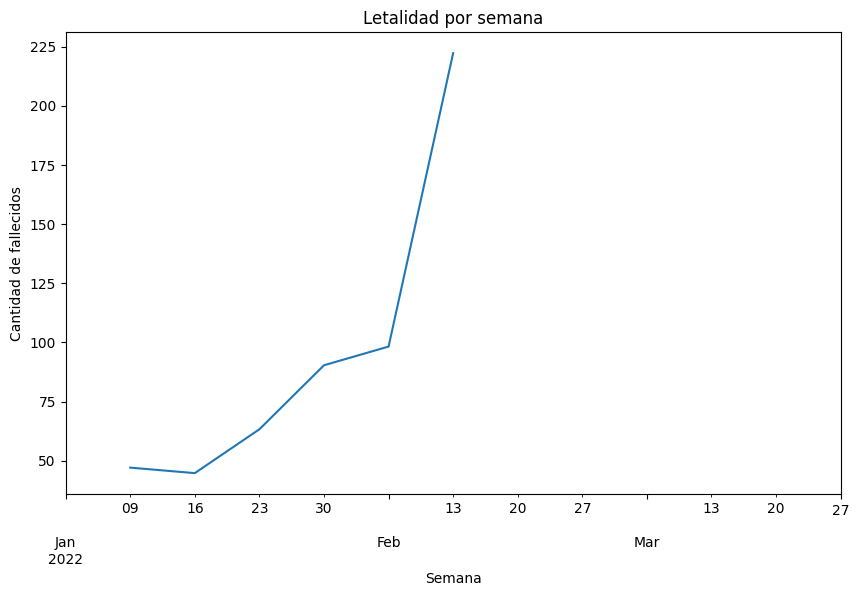

In [86]:
mask_hermosillo = (df['MUNICIPIO_RES'] == 30)

df['FECHA_INGRESO_HERMOSILLO'] = pd.to_datetime(df.loc[mask_hermosillo, 'FECHA_INGRESO'], format='%Y-%m-%d')

ingresos_por_semana_hermosillo = df.resample('W', on='FECHA_INGRESO_HERMOSILLO')['FECHA_INGRESO_HERMOSILLO'].count()

df['FECHA_DEF_HERMOSILLO'] = pd.to_datetime(df.loc[mask_hermosillo,'FECHA_DEF'], format='%Y-%m-%d', errors='coerce')

df.dropna(subset=['FECHA_DEF_HERMOSILLO'], inplace=True)

fallecidos_por_semana_hermosillo = df.resample('W', on='FECHA_DEF_HERMOSILLO')['FECHA_DEF_HERMOSILLO'].count()

letalidad_por_semana_hermosillo = (fallecidos_por_semana_hermosillo / ingresos_por_semana_hermosillo) * 100

print(letalidad_por_semana_hermosillo)

letalidad_por_semana_hermosillo.plot(figsize=(10, 6))
plt.title('Letalidad por semana')
plt.xlabel('Semana')
plt.ylabel('Cantidad de fallecidos')
plt.show()

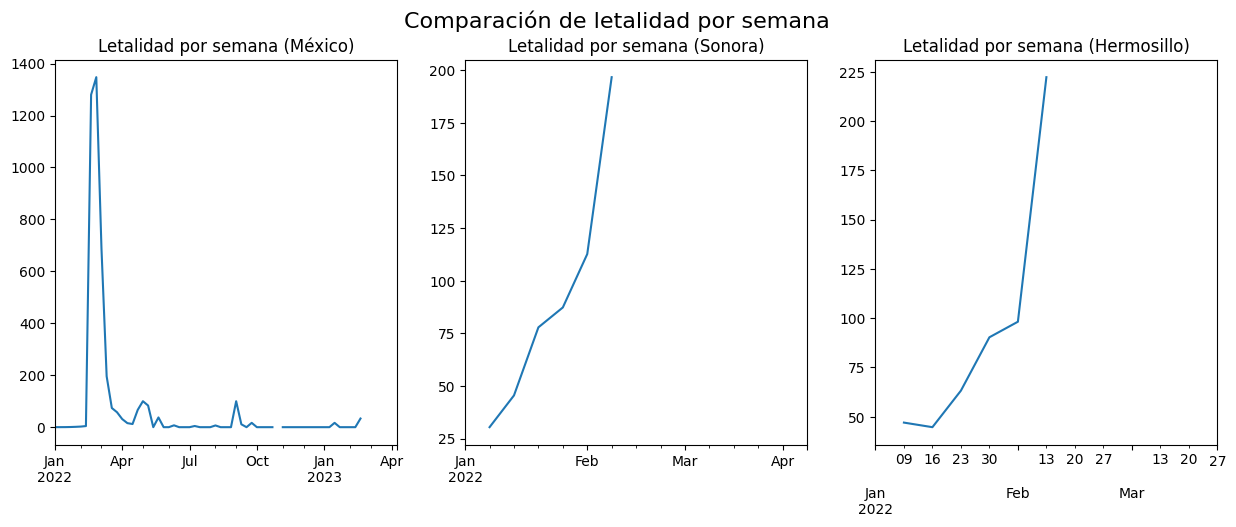

In [87]:
# Crear una figura con 3 sub-figuras
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Graficar la letalidad por semana para México
letalidad_por_semana.plot(ax=axs[0])
axs[0].set_title('Letalidad por semana (México)')

# Graficar la letalidad por semana para Sonora
letalidad_por_semana_sonora.plot(ax=axs[1])
axs[1].set_title('Letalidad por semana (Sonora)')

# Graficar la letalidad por semana para Hermosillo
letalidad_por_semana_hermosillo.plot(ax=axs[2])
axs[2].set_title('Letalidad por semana (Hermosillo)')

# Agregar un título a la figura
fig.suptitle('Comparación de letalidad por semana', fontsize=16)

# Mostrar la figura
plt.show()

fig.canvas.print_figure('figura.png')

In [88]:
dfEdad = pd.read_csv('datos_abiertos_covid19.zip', nrows=200000, compression='zip', header=0, sep=',', quotechar='"')

# Definir los rangos de edad
rangos_edad = [(0, 18), (18, 30), (30, 60), (60, np.inf)]
nombres_edad = ['0-18', '18-30', '30-60', '60+']

# Agrupar los datos por grupo etario
dfEdad['GRUPO_ETARIO'] = pd.cut(dfEdad['EDAD'], bins=[rango[0] for rango in rangos_edad] + [np.inf], labels=nombres_edad)
grupos_etarios = dfEdad.groupby('GRUPO_ETARIO')

dfEdad['FECHA_DEF_EDAD'] = pd.to_datetime(dfEdad['FECHA_DEF'], format='%Y-%m-%d', errors='coerce')
dfEdad.dropna(subset=['FECHA_DEF_EDAD'], inplace=True)

# #Calcular el número de ingresados y decesos por grupo etario

ingresados = grupos_etarios.size().rename('INGRESADOS').to_frame()
fallecidos = dfEdad.groupby('GRUPO_ETARIO')['FECHA_DEF'].count().reset_index(name='FALLECIDOS')

# Unir las dos tablas por la columna GRUPO_ETARIO
tabla = ingresados.merge(fallecidos, on='GRUPO_ETARIO')

# Calcular la letalidad por grupo etario y agregarla como columna
tabla['LETALIDAD'] = tabla['FALLECIDOS'] / tabla['INGRESADOS']

# Guardar la tabla en un archivo CSV comprimido en formato ZIP
tabla.to_csv('tabla.csv.zip', index_label='GRUPO_ETARIO', compression='zip')

In [90]:
tabla

,GRUPO_ETARIO,INGRESADOS,FALLECIDOS,LETALIDAD
0,0-18,18368,21,0.001143
1,18-30,58015,31,0.000534
2,30-60,108282,256,0.002364
3,60+,15230,553,0.036310
